# Correlation & Causality Through Time

In [1]:
import numpy as np
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
countyData = pd.read_csv("data/countyData.csv", dtype = "str") ### county level
stateData = pd.read_csv("data/stateData.csv", dtype = "str") ### state level
usaData = pd.read_csv("data/usaData.csv", dtype = "str") ### country level
demoDeaths = pd.read_csv("data/demoDeaths.csv") ### demographic deaths data
raceDeaths = pd.read_csv("data/raceDeaths.csv") ### racial deaths data
hospital = pd.read_csv("data/hospitalData.csv") ### hospitalization estimates
GoogleUsaMobility = pd.read_csv('data/GoogleUsaMobility.csv')
GoogleStateMobility = pd.read_csv('data/GoogleStateMobility.csv')
GoogleCountyMobility = pd.read_csv('data/GoogleCountyMobility.csv', dtype = "str")
NYTusa = pd.read_csv('data/NYTusa.csv')
NYTstate = pd.read_csv('data/NYTstate.csv')
NYTcounty = pd.read_csv('data/NYTcounty.csv', dtype = "str")



import json
counties = open("data/geojson-counties-fips.json",) ### Data for creating maps
counties = json.load(counties)


### Convert data types
countyData = countyData.astype({"Date" : "datetime64",
                                "Total Cases" : "int64",
                                "Total Deaths" : "int64",
                                "Population" : "int64",
                                "New Cases" : "int64",
                                "New Deaths" : "int64",
                                "%Cases" : "float64",
                                "%Deaths" : "float64", 
                                "log(Total Cases)" : "float64",
                                "log(Total Deaths)" : "float64",
                                "log(New Cases)" : "float64", 
                                "log(New Deaths)" : "float64"})

stateData = stateData.astype({"Date" : "datetime64",
                              "Total Cases" : "int64",
                              "Total Deaths" : "int64",
                              "Population" : "int64",
                              "New Cases" : "int64",
                              "New Deaths" : "int64",
                              "%Cases" : "float64",
                              "%Deaths" : "float64", 
                              "log(Total Cases)" : "float64",
                              "log(Total Deaths)" : "float64",
                              "log(New Cases)" : "float64", 
                              "log(New Deaths)" : "float64"})

usaData = usaData.astype({"Date" : "datetime64",
                          "Total Cases" : "int64",
                          "Total Deaths" : "int64",
                          "Population" : "int64",
                          "New Cases" : "int64",
                          "New Deaths" : "int64",
                          "%Cases" : "float64",
                          "%Deaths" : "float64", 
                          "log(Total Cases)" : "float64",
                          "log(Total Deaths)" : "float64",
                          "log(New Cases)" : "float64", 
                          "log(New Deaths)" : "float64"})

GoogleCountyMobility = GoogleCountyMobility.astype({"Date" : "datetime64",
                                                    "%Retail/Rec Change" : "float64",
                                                    "%Grocery/Pharm Change" : "float64",
                                                    "%Parks Change" : "float64",
                                                    "%Transit Change" : "float64",
                                                    "%Workplace Change" : "float64",
                                                    "%Residential Change" : "float64"})



NYTcounty = NYTcounty.astype({"Date" : "datetime64",
                              "Total Cases" : "float64",
                              "Total Deaths" : "float64",
                              "Population" : "float64",
                              "New Cases" : "float64",
                              "New Deaths" : "float64",
                              "%Cases" : "float64",
                              "%Deaths" : "float64", 
                              "log(Total Cases)" : "float64",
                              "log(Total Deaths)" : "float64",
                              "log(New Cases)" : "float64", 
                              'log(New Deaths)' : "float64"})
                                


In [3]:
usaData

Country       Date  Total Cases  Total Deaths  Population  \
0    United States 2020-01-22            1             0   328233889   
1    United States 2020-01-23            1             0   328233889   
2    United States 2020-01-24            2             0   328233889   
3    United States 2020-01-25            2             0   328233889   
4    United States 2020-01-26            5             0   328233889   
..             ...        ...          ...           ...         ...   
185  United States 2020-07-25      4144946        144650   328233889   
186  United States 2020-07-26      4199694        145095   328233889   
187  United States 2020-07-27      4257780        146777   328233889   
188  United States 2020-07-28      4322016        147098   328233889   
189  United States 2020-07-29      4398947        149719   328233889   

     New Cases  New Deaths  %Cases  %Deaths  log(Total Cases)  \
0            0           0   0.000    0.000             0.000   
1            0           0   0.000    0.000             0.000   
2            1           0   0.000    0.000             0.693   
3            0           0   0.000    0.000             0.693   
4            3           0   0.000    0.000             1.609   
..         ...         ...     ...      ...               ...   
185      64466         666   1.263    0.044            15.237   
186      54748         445   1.279    0.044            15.251   
187      58086        1682   1.297    0.045            15.264   
188      64236         321   1.317    0.045            15.279   
189      76931        2621   1.340    0.046            15.297   

     log(Total Deaths)  log(New Cases)  log(New Deaths)  
0                 -inf            -inf             -inf  
1                 -inf            -inf             -inf  
2                 -inf           0.000             -inf  
3                 -inf            -inf             -inf  
4                 -inf           1.099             -inf  
..                 ...             ...              ...  
185             11.882          11.074            6.501  
186             11.885          10.910            6.098  
187             11.897          10.970            7.428  
188             11.899          11.070            5.771  
189             11.917          11.251            7.871  

[190 rows x 13 columns]

In [4]:
GoogleUsaMobility

Country        Date  %Retail/Rec Change  %Grocery/Pharm Change  \
0    United States  2020-02-15                   6                      2   
1    United States  2020-02-16                   7                      1   
2    United States  2020-02-17                   6                      0   
3    United States  2020-02-18                   0                     -1   
4    United States  2020-02-19                   2                      0   
..             ...         ...                 ...                    ...   
157  United States  2020-07-21                 -13                     -2   
158  United States  2020-07-22                 -13                     -3   
159  United States  2020-07-23                 -14                     -2   
160  United States  2020-07-24                 -17                     -4   
161  United States  2020-07-25                 -19                     -2   

     %Parks Change  %Transit Change  %Workplace Change  %Residential Change  
0               15                3                  2                   -1  
1               16                2                  0                   -1  
2               28               -9                -24                    5  
3                6                1                  0                    1  
4                8                1                  1                    0  
..             ...              ...                ...                  ...  
157             54              -32                -38                   11  
158             47              -32                -37                   11  
159             55              -31                -37                   11  
160             55              -30                -37                   11  
161             77              -21                -13                    4  

[162 rows x 8 columns]

# 

## Granger Causality

The Granger causality test is a statistical hypothesis test for determining whether one time series is useful in forecasting another.
Ordinarily, regressions reflect "mere" correlations, but Clive Granger argued that causality in economics could be tested for by measuring the ability to predict the future values of a time series using prior values of another time series. 

Econometricians assert that the Granger test finds only "predictive causality". Using the term "causality" alone is a misnomer, as Granger-causality is better described as "precedence", or, as Granger himself later claimed in 1977, "temporally related". Rather than testing whether Y causes X, the Granger causality tests whether Y forecasts X. The original definition of Granger causality does not account for latent confounding effects and does not capture instantaneous and non-linear causal relationships, though several extensions have been proposed to address these issues.

Source: https://en.wikipedia.org/wiki/Granger_causality

X(t) granger causes Y(t), if the past values of X(t) help in predicting the future values of Y(t).

__Conditions__:
- Cause happens prior to effect.
- Cause has unique information about the future values of its effects.

$\LARGE Y_t = F(Y_{t-p}, X_{t-p})$

$\LARGE Y_t = \alpha_0 + \alpha_1Y_{t-1} + \alpha_2Y_{t-2} + \dots + \alpha_pY_{t-p} + \beta_1X_{t-1} + \dots + \beta_pX_{t-p} + \epsilon_t$

<br>

$\LARGE H_0: \beta_1 = \beta_2 = \dots = \beta_p = 0$

$\LARGE H_{\alpha}: \text{At least one } \beta_p \neq 0 $

__Limitations__:
- Granger causality (GC) is not necessarily true causality
- If X(t) affects Y(t) through a third variable Z(t), then we may not be able to find GC.



In [5]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [6]:
def plot_granger_pval(mobilityMeasure):
    x = usaData[(usaData["Date"] >= np.min(GoogleUsaMobility["Date"])) & (usaData["Date"] <= np.max(GoogleUsaMobility["Date"]))]
    
    y = pd.DataFrame({'New Cases' : x['New Cases'], mobilityMeasure  : GoogleUsaMobility[mobilityMeasure]}).dropna()
    g = grangercausalitytests(y, maxlag = 35, verbose = False)

    testType = []
    pval = []
    lagnum = []

    for i in range(1,36):
        for test in list(g[1][0].keys()):
            pval.append(g[i][0][test][1])
            testType.append(test)
            lagnum.append(i)

    gc = pd.DataFrame({'Number of Lags' : lagnum, 'P-Value' : pval, 'Test': testType})
    gc

    fig = px.line(gc, x = 'Number of Lags', y = 'P-Value', color = 'Test')
    fig.update_layout(shapes = [dict(type = 'line', yref = 'y', y0 = 0.05, y1= 0.05, xref = 'paper', x0 = 0, x1 = 1)],
                      title = 'P-Value for Granger Causality (New Cases vs. ' + mobilityMeasure + ') [National Level]')
    
    return fig

In [7]:
GoogleUsaMobility.columns[2:]

Index(['%Retail/Rec Change', '%Grocery/Pharm Change', '%Parks Change',
       '%Transit Change', '%Workplace Change', '%Residential Change'],
      dtype='object')

In [8]:
fig1 = plot_granger_pval(GoogleUsaMobility.columns[2])
fig2 = plot_granger_pval(GoogleUsaMobility.columns[3])
fig3 = plot_granger_pval(GoogleUsaMobility.columns[4])
fig4 = plot_granger_pval(GoogleUsaMobility.columns[5])
fig5 = plot_granger_pval(GoogleUsaMobility.columns[6])
fig6 = plot_granger_pval(GoogleUsaMobility.columns[7])

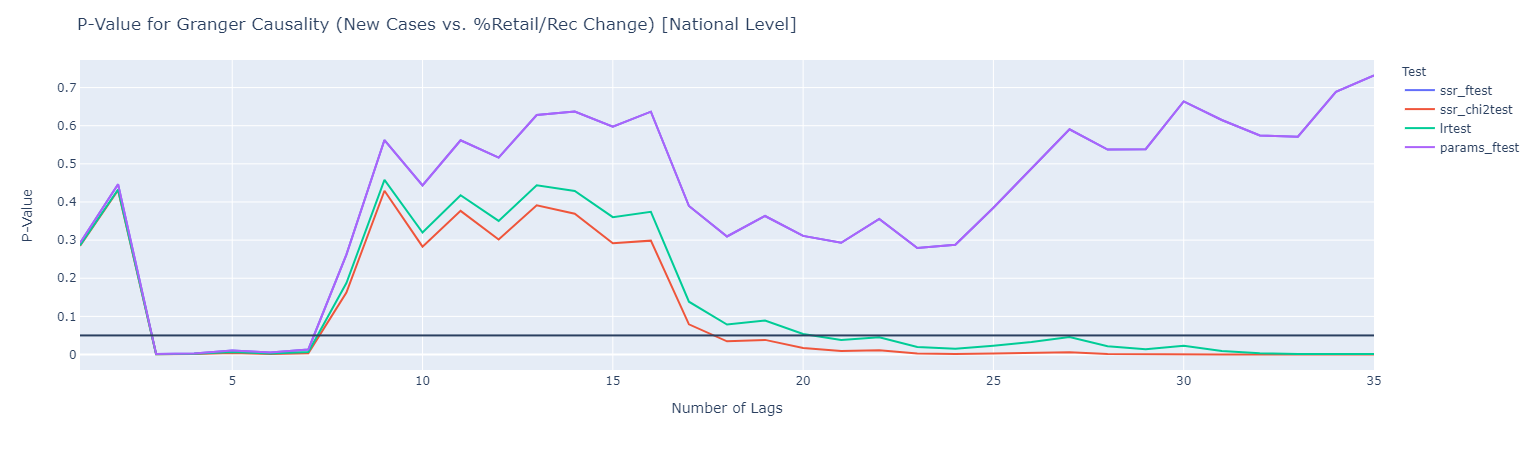

In [9]:
fig1

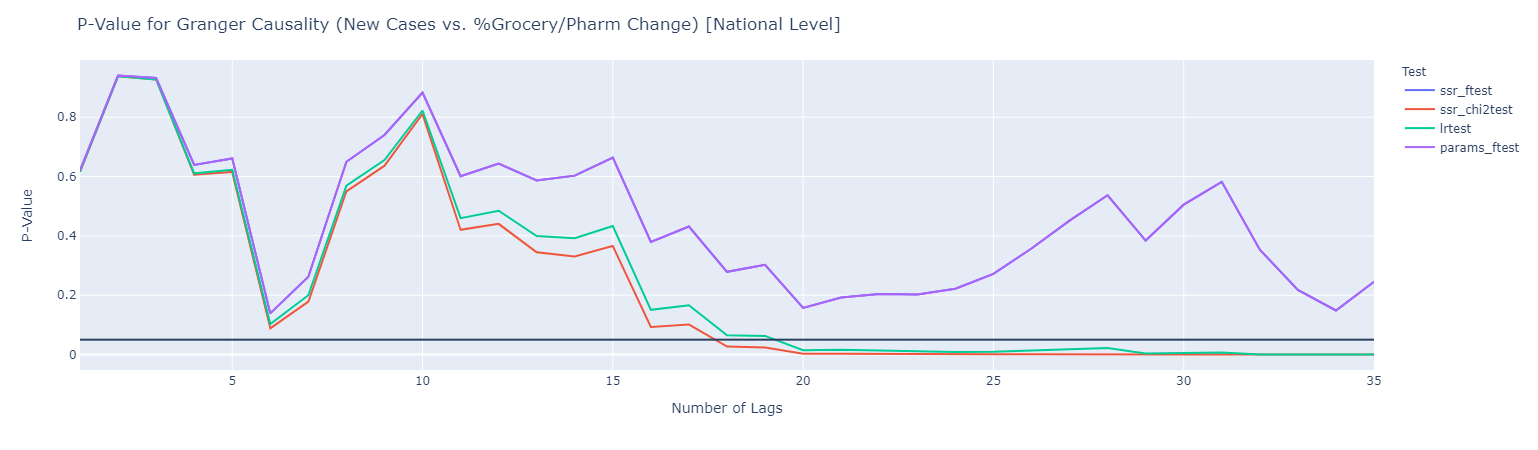

In [10]:
fig2

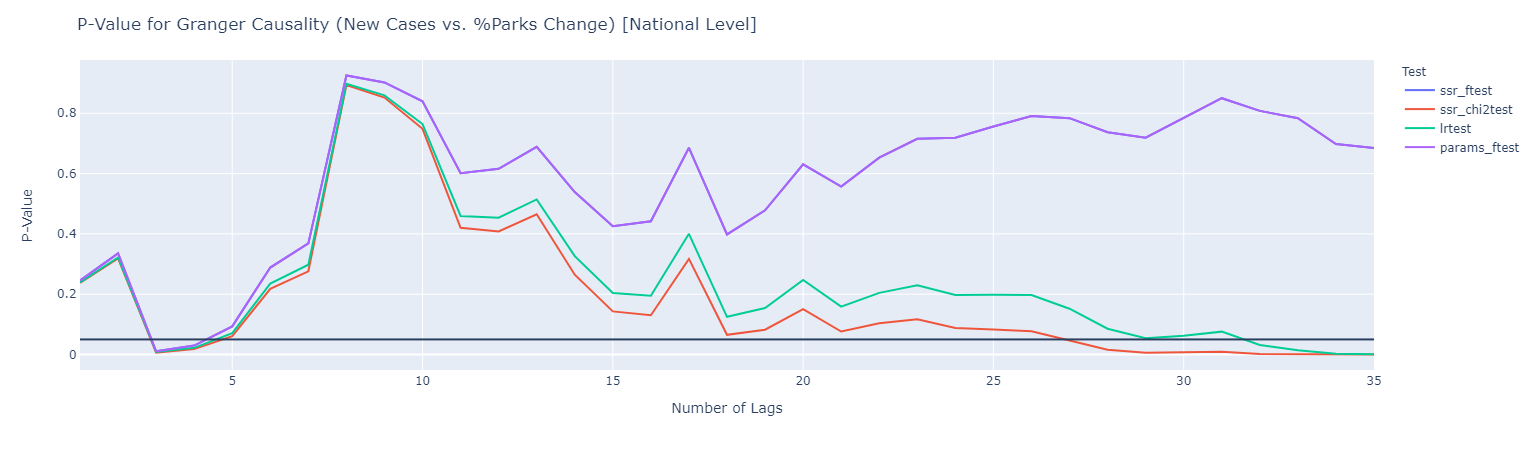

In [11]:
fig3

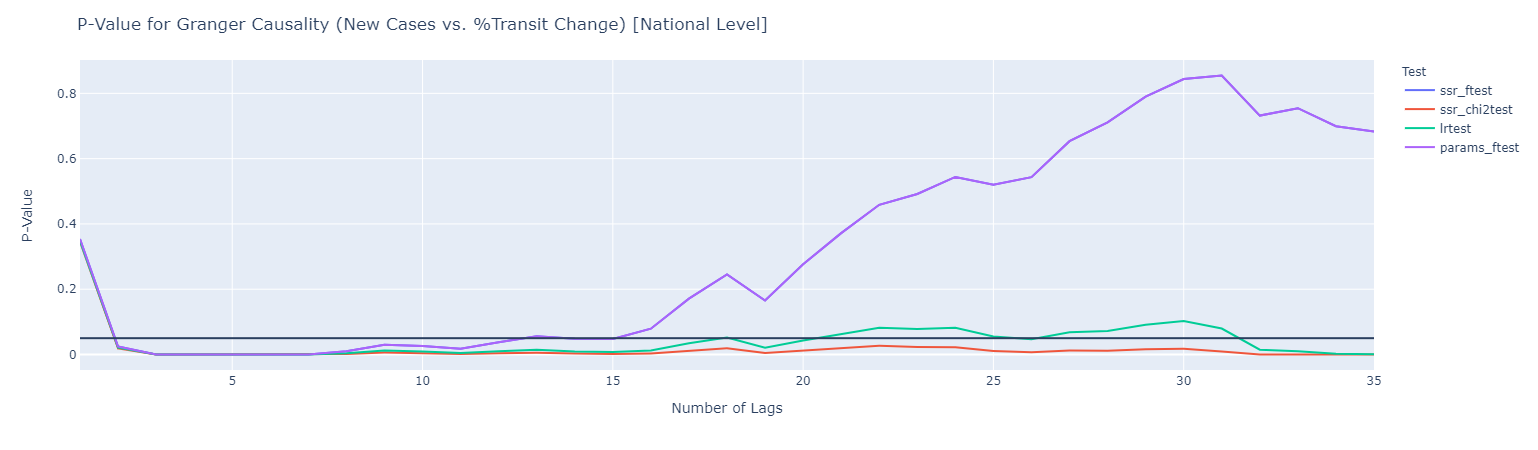

In [12]:
fig4

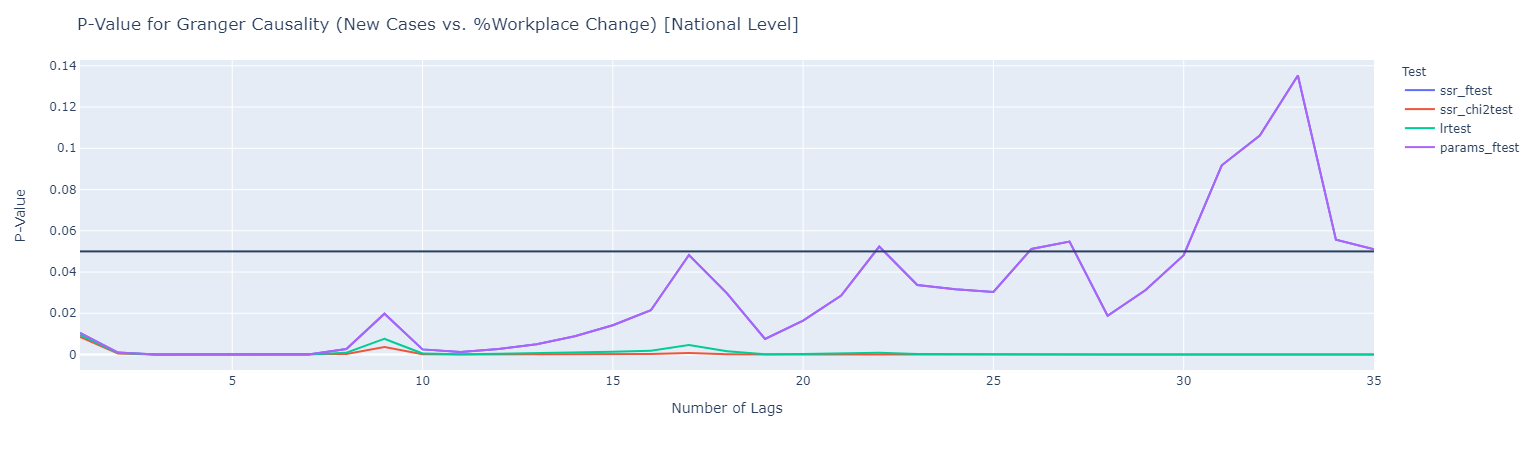

In [13]:
fig5

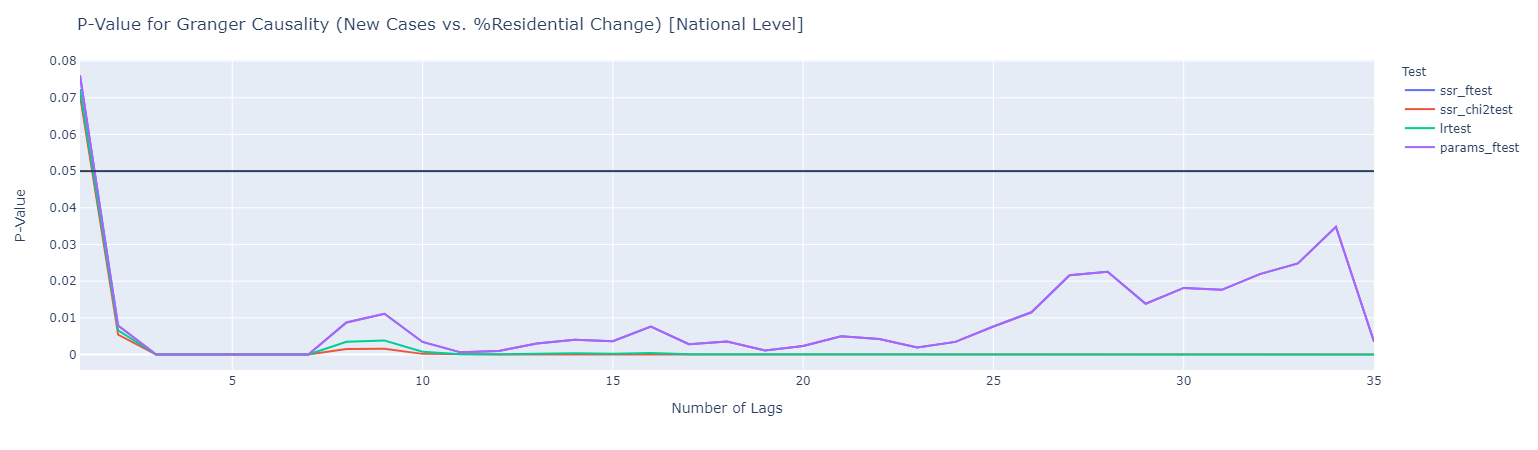

In [14]:
fig6

# 
# 

# Modeling

## Linear model based on granger causality

### National Level, USAFacts.org

In [15]:
GoogleUsaMobility = GoogleUsaMobility.astype({'Date' : 'datetime64'})
data1 = usaData[['Date', 'New Cases']].merge(GoogleUsaMobility[1:], on = 'Date', how = 'inner')
data1 = data1.drop(columns = ['Country', 'Date'])
data1

New Cases  %Retail/Rec Change  %Grocery/Pharm Change  %Parks Change  \
0            0                   7                      1             16   
1            0                   6                      0             28   
2            1                   0                     -1              6   
3            0                   2                      0              8   
4            0                   1                      0              4   
..         ...                 ...                    ...            ...   
156      66694                 -13                     -2             54   
157      67276                 -13                     -3             47   
158      68395                 -14                     -2             55   
159      74013                 -17                     -4             55   
160      64466                 -19                     -2             77   

     %Transit Change  %Workplace Change  %Residential Change  
0                  2                  0                   -1  
1                 -9                -24                    5  
2                  1                  0                    1  
3                  1                  1                    0  
4                  0                  0                    1  
..               ...                ...                  ...  
156              -32                -38                   11  
157              -32                -37                   11  
158              -31                -37                   11  
159              -30                -37                   11  
160              -21                -13                    4  

[161 rows x 7 columns]

In [16]:
toLag = data1.copy()
for i in range(1,10):
    lagData = toLag.shift(i)
    lagData.columns = lagData.columns + '_lag' + str(i)
    data1 = data1.merge(lagData, how = 'inner', right_index = True, left_index = True)

In [17]:
data1 = data1.drop(columns = data1.columns[1:7])
data1 = data1.dropna()
data1

New Cases  New Cases_lag1  %Retail/Rec Change_lag1  \
9            0             1.0                      2.0   
10           2             0.0                      4.0   
11           1             2.0                      7.0   
12           2             1.0                      8.0   
13          11             2.0                      8.0   
..         ...             ...                      ...   
156      66694         58677.0                    -14.0   
157      67276         66694.0                    -13.0   
158      68395         67276.0                    -13.0   
159      74013         68395.0                    -14.0   
160      64466         74013.0                    -17.0   

     %Grocery/Pharm Change_lag1  %Parks Change_lag1  %Transit Change_lag1  \
9                           1.0                 9.0                   1.0   
10                          1.0                 9.0                   2.0   
11                          2.0                 5.0                   3.0   
12                          3.0                12.0                   4.0   
13                          3.0                10.0                   5.0   
..                          ...                 ...                   ...   
156                        -4.0                51.0                 -32.0   
157                        -2.0                54.0                 -32.0   
158                        -3.0                47.0                 -32.0   
159                        -2.0                55.0                 -31.0   
160                        -4.0                55.0                 -30.0   

     %Workplace Change_lag1  %Residential Change_lag1  New Cases_lag2  \
9                       3.0                       0.0             0.0   
10                      2.0                       0.0             1.0   
11                      2.0                      -1.0             0.0   
12                      2.0                       0.0             2.0   
13                      2.0                      -1.0             1.0   
..                      ...                       ...             ...   
156                   -38.0                      10.0         61040.0   
157                   -38.0                      11.0         58677.0   
158                   -37.0                      11.0         66694.0   
159                   -37.0                      11.0         67276.0   
160                   -37.0                      11.0         68395.0   

     %Retail/Rec Change_lag2  ...  %Transit Change_lag8  \
9                        7.0  ...                  -9.0   
10                       2.0  ...                   1.0   
11                       4.0  ...                   1.0   
12                       7.0  ...                   0.0   
13                       8.0  ...                   1.0   
..                       ...  ...                   ...   
156                    -17.0  ...                 -31.0   
157                    -14.0  ...                 -31.0   
158                    -13.0  ...                 -31.0   
159                    -13.0  ...                 -31.0   
160                    -14.0  ...                 -29.0   

     %Workplace Change_lag8  %Residential Change_lag8  New Cases_lag9  \
9                     -24.0                       5.0             0.0   
10                      0.0                       1.0             0.0   
11                      1.0                       0.0             1.0   
12                      0.0                       1.0             0.0   
13                      0.0                       0.0             0.0   
..                      ...                       ...             ...   
156                   -38.0                      10.0         57509.0   
157                   -38.0                      11.0         55604.0   
158                   -37.0                      11.0         67899.0   
159                   -37.0                      11.0  

In [18]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import math

In [19]:
X = data1[data1.columns[1:]]
X = sm.add_constant(X)
Y = data1[data1.columns[0]]

In [20]:
xtrain = X.iloc[0:math.floor(0.7 * len(X))]
xtest = X.iloc[math.floor(0.7 * len(X)):]

ytrain = Y.iloc[0:math.floor(0.7 * len(Y))]
ytest = Y.iloc[math.floor(0.7 * len(Y)):]

In [21]:
flag = True

### Backwards selection
while flag == True:
    lm1 = sm.OLS(ytrain,xtrain).fit() ### fit model
    
    ### if the largest p-value is greater than or equal to 0.05, not including constant
    if np.max(lm1.pvalues[1:]) >= 0.05:
        
        ### Drop column
        xtrain = xtrain.drop(columns = lm1.pvalues[1:].index[np.argmax(lm1.pvalues[1:])])
    
    else:
        flag = False

In [22]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              New Cases   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     457.5
Date:                Thu, 30 Jul 2020   Prob (F-statistic):           1.81e-76
Time:                        13:20:18   Log-Likelihood:                -927.21
No. Observations:                 106   AIC:                             1878.
Df Residuals:                      94   BIC:                             1910.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

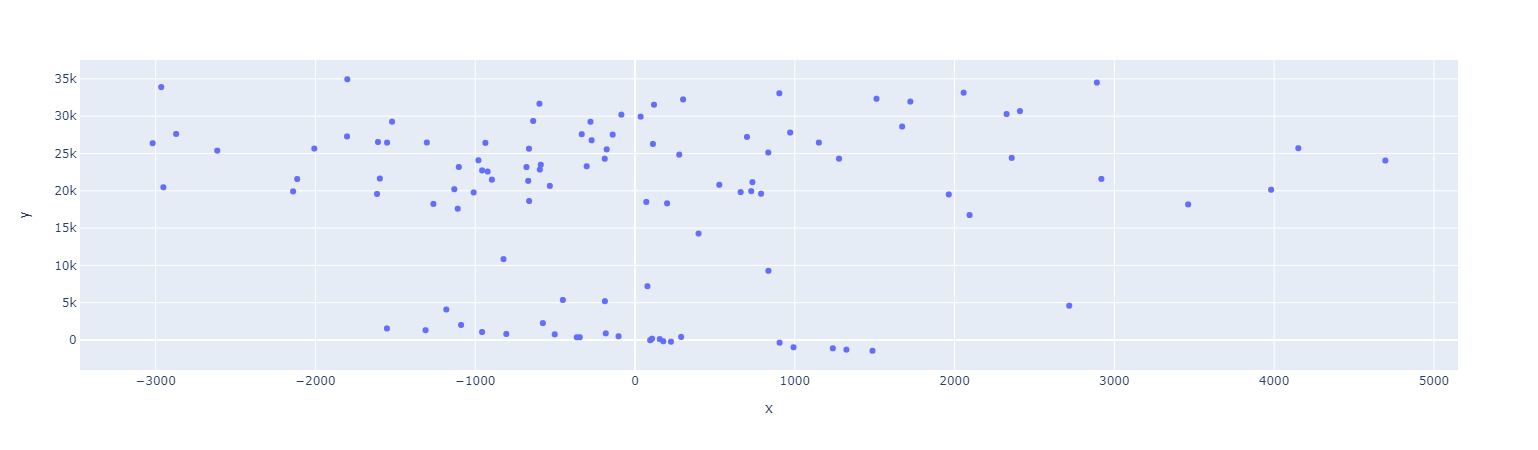

In [23]:
px.scatter(x = lm1.resid, y = lm1.fittedvalues)

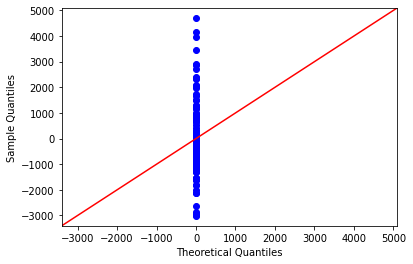

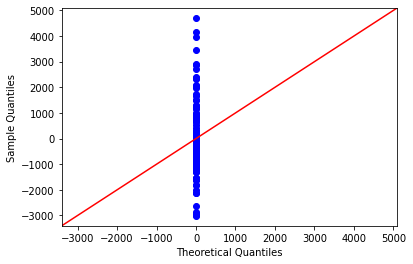

In [24]:
sm.qqplot(lm1.resid, line = '45')

In [25]:
xtest = xtest[list(lm1.pvalues.index)]

In [26]:
preds = lm1.get_prediction(xtest).summary_frame()
preds['True'] = ytest
preds.head(5)

mean     mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
115  20022.080251  395.816356   19236.177598   20807.982904  16716.373026   
116  22348.375906  613.892651   21129.477656   23567.274156  18913.878822   
117  23670.567258  626.954677   22425.734049   24915.400466  20226.780534   
118  21706.653931  612.681947   20490.159563   22923.148299  18273.009246   
119  18850.849908  637.536783   17585.005681   20116.694135  15399.412688   

     obs_ci_upper   True  
115  23327.787476  20442  
116  25782.872991  22520  
117  27114.353981  25704  
118  25140.298617  25727  
119  22302.287129  20464

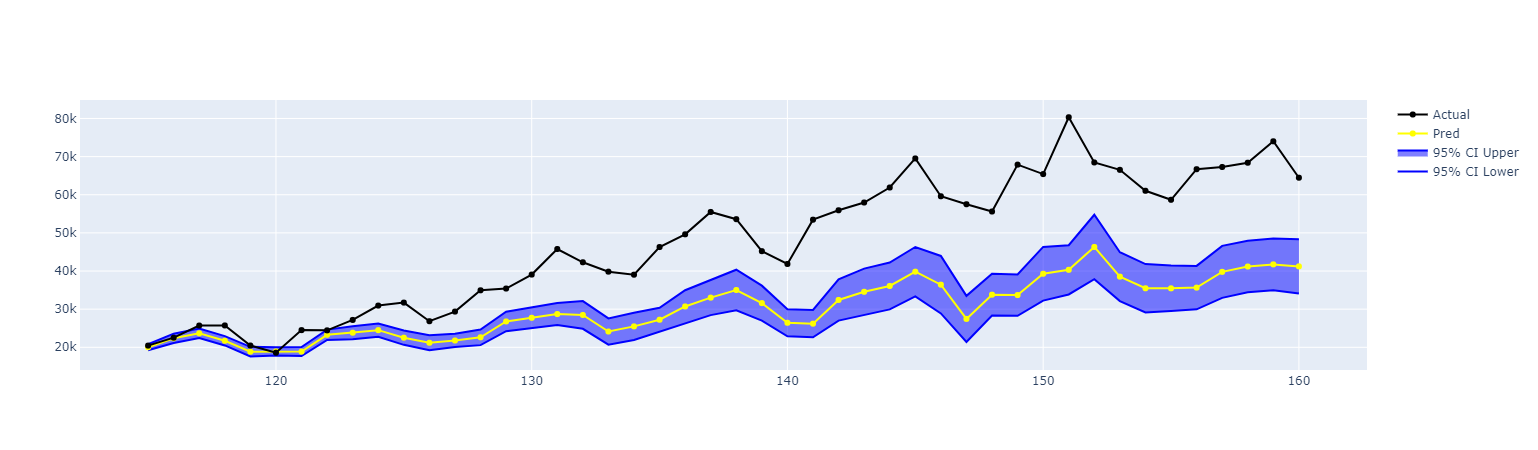

In [27]:
fig = go.Figure()

fig.add_trace(go.Scatter(x = list(preds.index), y = preds['mean_ci_lower'], name = '95% CI Lower', mode = 'lines', marker=dict(color = 'blue')))
fig.add_trace(go.Scatter(x = list(preds.index), y = preds['mean_ci_upper'], name = '95% CI Upper', mode = 'lines', marker=dict(color = 'blue'),
                        fill = 'tonexty'))
fig.add_trace(go.Scatter(x = list(preds.index), y = preds['mean'], name = 'Pred', mode = 'markers+lines', marker=dict(color = 'yellow')))
fig.add_trace(go.Scatter(x = list(preds.index), y = preds['True'], name = 'Actual', mode = 'markers+lines', marker=dict(color = 'black')))


# 
# ARIMA

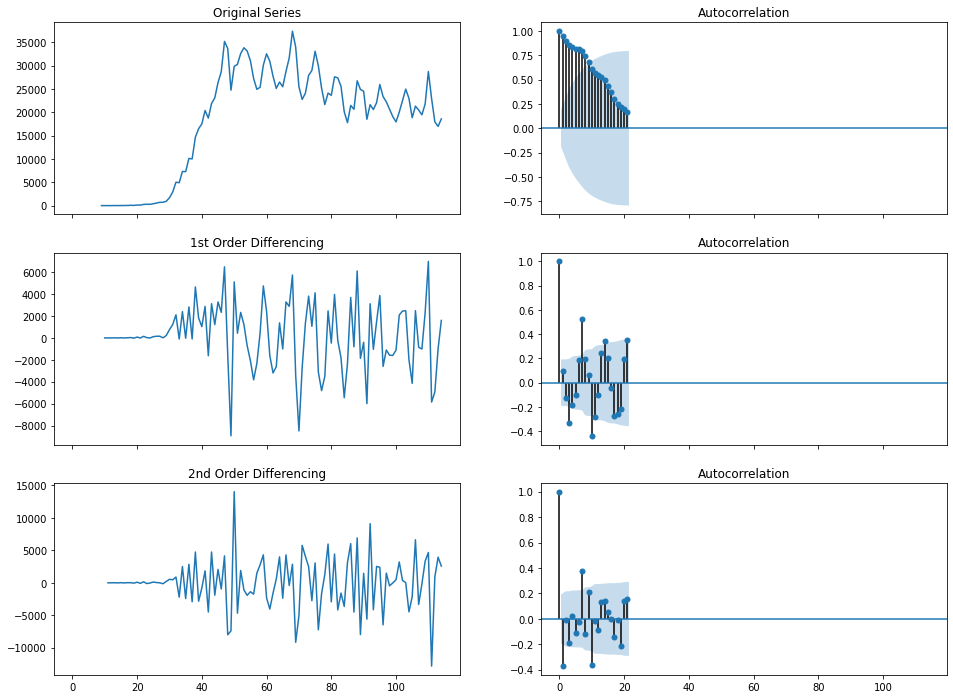

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
# Original Series
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16, 12))
axes[0, 0].plot(ytrain); axes[0, 0].set_title('Original Series')
plot_acf(ytrain, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(ytrain.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(ytrain.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(ytrain.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(ytrain.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [32]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(ytrain, order = (2,1,1))
model_fit = model.fit(disp = 0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.New Cases   No. Observations:                  105
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -981.418
Method:                       css-mle   S.D. of innovations           2770.466
Date:                Thu, 30 Jul 2020   AIC                           1972.835
Time:                        13:25:10   BIC                           1986.105
Sample:                             1   HQIC                          1978.213
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               192.8338    177.299      1.088      0.277    -154.666     540.333
ar.L1.D.New Cases     0.6619      0.137      4.814      0.000       0.392       0.931
ar.L2.D.New Cases    -0.

/home/hcup-server2/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/home/hcup-server2/.local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:214: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



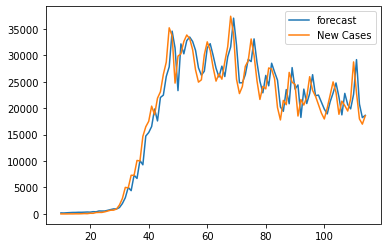

In [45]:
from matplotlib.pyplot import figure
p = model_fit.plot_predict(dynamic = False)
# plt.figure(figsize=(50,25))
# plt.show()